In [1]:
import pandas as pd
from data import load_database
from plotter import plot_all_readings
import matplotlib.pyplot as plt
from preprocessing import interpolate_reading
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

database = pd.DataFrame(data=load_database().to_dict())
database

,readings,spell,author,device,date
0,"{'ACC': [[0.046842992305755615, 2.6384103, 3.3...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:13.728936
1,"{'ACC': [[0.007115989923477173, -0.16759412, 2...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:06.670531
2,"{'ACC': [[0.13349801301956177, 7.0844426, 1.76...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:09.815516
3,"{'ACC': [[0.0065760016441345215, -0.8882488, 4...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:28.542751
4,"{'ACC': [[0.08161100745201111, -1.3503298, 0.9...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:17.161701
...,...,...,...,...,...
81,"{'ACC': [[0.007611006498336792, -7.433996, 2.0...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:28.825398
82,"{'ACC': [[0.007923007011413574, 10.730812, 0.9...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:07.693713
83,"{'ACC': [[0.08246001601219177, -8.616732, 2.14...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:17.554542
84,"{'ACC': [[0.007611006498336792, -4.807557, 3.5...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:21.513534


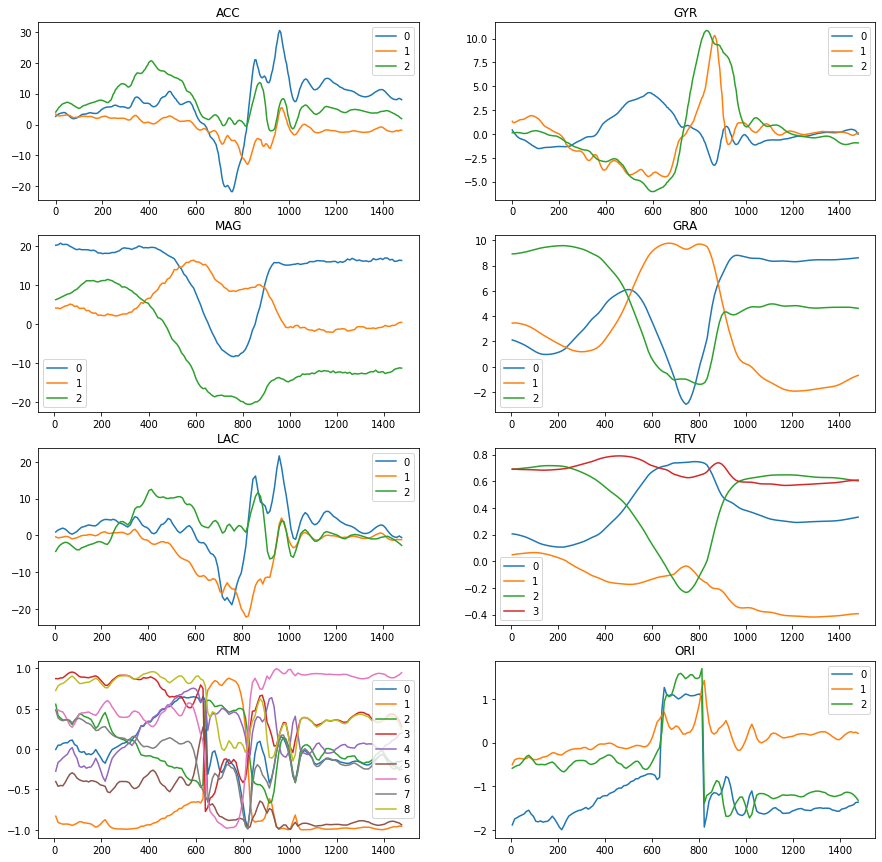

In [2]:
readings = database['readings'][0]
plot_all_readings(readings,  table_format=(4, 2))

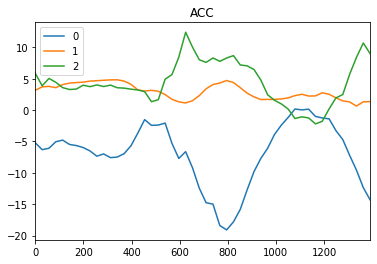

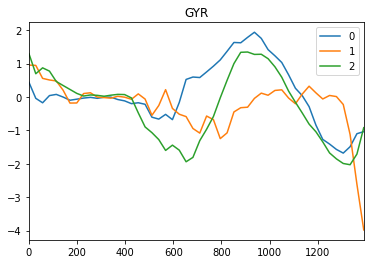

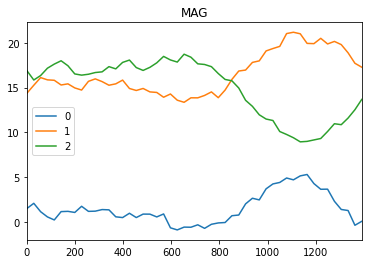

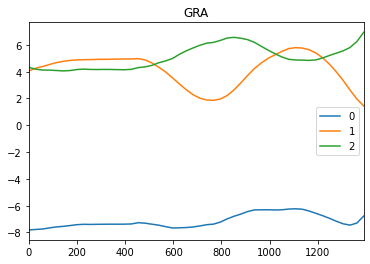

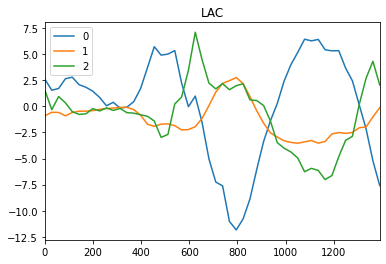

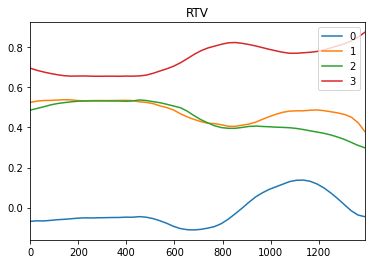

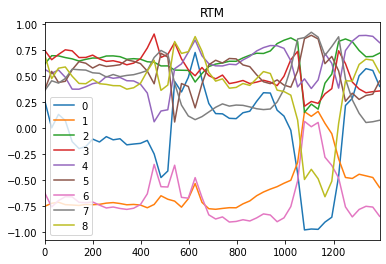

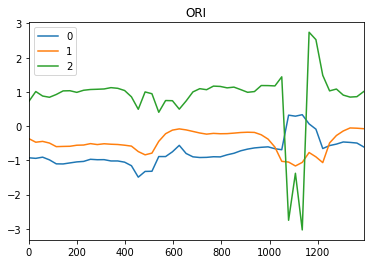

In [3]:
plot_all_readings(interpolate_readings(readings))

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

X = []
y = []

for i, reading in enumerate(database['readings']):
    X.append(reading['ACC'][1:].reshape(-1))
    y.append(database['spell'][i])
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

ValueError: setting an array element with a sequence.

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    

NameError: name 'interpolate_readings' is not defined

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_reading(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)
print(y)

clf = LogisticRegression(random_state=0, max_iter=100000)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

AttributeError: 'dict' object has no attribute 'get_min_timestamp'

In [36]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)
print(y)

clf =  KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

['WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA'
 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'INCENDIO' 'INCENDIO'
 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO'
 'INCENDIO' 'INCENDIO']
[0.25       0.75       0.66666667 0.33333333 0.66666667 0.66666667
 0.66666667 1.         0.66666667 1.        ]


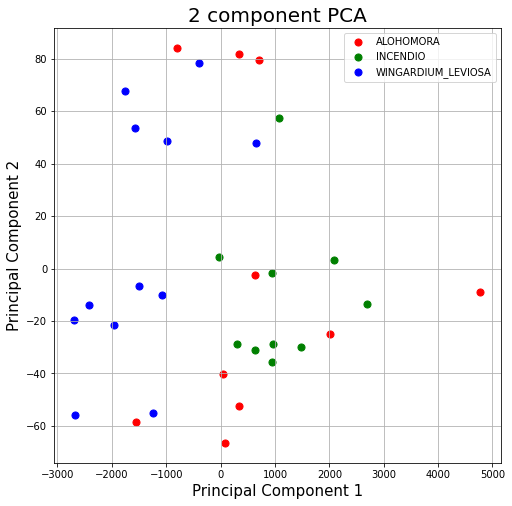

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)

#X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['spell'])], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['spell'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()